# Проект HR-аналитика

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.    

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.    

Удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.     

В рамках данного проекта нам необходимо решить 2 задачи:     
1. построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика;     
2. построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.     

Для решения указанных задач необходимо реализовать следующие шаги.     

**Задача 1. Предсказание уровня удовлетворенности сотрудников.**    
1. Изучить предоставленные заказчиком данные о сотрудниках. Обнаружить и устранить возможные проблемы в данных (дубли, пропуски, аномалии);      
2. Определить целевые и входные признаки для разработки модели машинного обучения. Проанализировать характер взаимосвязей между целевыми и входными признаками;    
3. Разработать модель, предсказывающую уровень удовлетворенности сотрудников, проверить результат работы модели на тестовой выборке, предоставленной заказчиком. В качестве метрики оценки качества модели должна быть использована SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). Критерием успеха будет значение SMAPE на тестовой выборки меньше или равное 15.    

**Задача 2. Предсказание оттока сотрудников.**     
1. Изучить предоставленные заказчиком данные о сотрудниках. Обнаружить и устранить возможные проблемы в данных (дубли, пропуски, аномалии);      
2. Составить "портрет увольняющегося сотрудника", т.е. выявить и описать закономерности распределения признаков, характерные для сотрудников, покинувших компанию.    
3. Определить, влияет ли уровень удовлетворенности сотрудников на принятие решения об увольнении;    
4. Определить целевые и входные признаки для разработки модели машинного обучения. Проанализировать характер взаимосвязей между целевыми и входными признаками;    
5. Разработать модель, предсказывающую факт увольнения сотрудника из компании. Качество модели необходимо измерить при помощи метрики ROC-AUC. Критерий успеха: ROC-AUC ≥0.91 на тестовой выборке.    

Исследование будет поделено на 2 части в соответствии с задачами. Сначала мы исполним шаги, намеченные для решения задачи 1, в итоге опишем полученные выводы. После этого перейдем к решению задачи 2, в ходе решения используем выводы, полученные при решении задачи 1. Результаты решения обеих задач соберем в общий вывод исследования.

**Описание данных**    

Для решения каждой из указанных задач нам предоставлены отдельные выборки.    

***Выборки для предсказания уровня удовлетворенности сотрудников***     
Тренировочная выборка - файл train_job_satisfaction_rate.csv    
Входные признаки тестовой выборки - test_features.csv    
Целевой признак тестовой выборки - test_target_job_satisfaction_rate.csv     
Данные в выборках:     
*id* — уникальный идентификатор сотрудника;    
*dept* — отдел, в котором работает сотрудник;    
*level* — уровень занимаемой должности;    
*workload* — уровень загруженности сотрудника;    
*employment_years* — длительность работы в компании (в годах);    
*last_year_promo* — показывает, было ли повышение за последний год;    
*last_year_violations* — показывает, нарушал ли сотрудник трудовой договор за последний год;    
*supervisor_evaluation* — оценка качества работы сотрудника, которую дал руководитель;    
*salary* — ежемесячная зарплата сотрудника;    
*job_satisfaction_rate* — уровень удовлетворённости сотрудника работой в компании, целевой признак.    

***Выборки для предсказания оттока сотрудников***     
Тренировочная выборка - файл train_quit.csv    
Входные признаки тестовой выборки - test_features.csv (те же, что и для предсказания удовлетворенности)       
Целевой признак тестовой выборки - test_target_quit.csv        
Данные в выборках:    
*id* — уникальный идентификатор сотрудника;    
*dept* — отдел, в котором работает сотрудник;    
*level* — уровень занимаемой должности;    
*workload* — уровень загруженности сотрудника;    
*employment_years* — длительность работы в компании (в годах);    
*last_year_promo* — показывает, было ли повышение за последний год;    
*last_year_violations* — показывает, нарушал ли сотрудник трудовой договор за последний год;    
*supervisor_evaluation* — оценка качества работы сотрудника, которую дал руководитель;    
*salary* — ежемесячная зарплата сотрудника;    
*quit* — увольнение сотрудника из компании.    

## Задача 1. Предсказание уровня удовлетворенности сотрудников

### 1.1. Загрузка данных

In [ ]:
!pip install --upgrade matplotlib -q # обновление библиотеки matplotlib для использования метода bar_values
!pip install phik -q # для расчета коэффициента Фи в ходе корреляционного анализа
!pip install --upgrade seaborn -q # обновление библиотеки seaborn для корректного вывода значений на тепловых картах
!pip install --upgrade scikit-learn -q # обновление scikit-learn для использования get_feature_names_out

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import seaborn as sns
from scipy import stats as st
from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from warnings import simplefilter


In [ ]:
train_jsr = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
test_jsr = pd.read_csv('/datasets/test_features.csv')
target_jsr = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

Изучим данные в каждой из выборок. Начнем с тренировочной.

In [ ]:
display(train_jsr.head())
train_jsr.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


В таблице 4000 строк и 10 столбцов. Название и содержание столбцов соответствуют описанию данных, тип данных в столбцах определен верно. Видны пропуски в столбцах dept и level.

Посмотрим теперь тестовые выборки. Сначала входные признаки.

In [ ]:
display(test_jsr.head())
test_jsr.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


2000 строк и 9 колонок. Признаки те же, что и в предыдущем файле, не хватает только целевого, но так и должно быть. Тип данных определен верно. Есть отдельные пропуски в столбцах dept и level.    

Взглянем на выборку с целевым признаком.

In [ ]:
display(target_jsr.head())
target_jsr.info()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


2000 строк со значениями целевого признака, тип данных определился верно. Пропуски на первый взгляд отсутствуют.    
Проверим, соответствуют ли сотрудники в таблице с входными признаками теста сотрудникам в таблице с целевым признаком. Для этого объединим таблицы по id.

In [ ]:
test_jsr = test_jsr.merge(target_jsr, on='id', how='left')
test_jsr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 171.9+ KB


#### Промежуточный вывод

Датасеты с информацией о сотрудниках успешно загружены и открыты. Информация в таблицах соответствует описанию данных, тип данных установлен верно. Есть отдельные пропуски в столбцах dept и level.

### 1.2. Предобработка данных

#### Пропуски

На этапе чтения файлов с данными мы обнаружили пропуски как в тренировочной, так и в тестовой выборках. Посмотрим, в каких столбцах и сколько их

In [ ]:
print('Количество пропусков в тренировочной выборке')
print(train_jsr.isna().sum())
print('Количество пропусков в тестовой выборке')
print(test_jsr.isna().sum())

Количество пропусков в тренировочной выборке
id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64
Количество пропусков в тестовой выборке
id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


В каждой из выборок пропусков совсем немного, и все они относятся к колонкам dept (подразделение сотрудника) и level (должность сотрудника). Посмотрим на строки таблиц с пропусками.

In [ ]:
print('Пропуски в dept тренировочной выборки')
display(train_jsr.query('dept.isna()'))
print('Пропуски в dept тестовой выборки')
display(test_jsr.query('dept.isna()'))
print('Пропуски в level тренировочной выборки')
display(train_jsr.query('level.isna()'))
print('Пропуски в level тестовой выборки')
display(test_jsr.query('level.isna()'))

Пропуски в dept тренировочной выборки


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


Пропуски в dept тестовой выборки


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
191,609865,NaN,junior,medium,1,no,no,1,20400,0.12
1196,832342,NaN,junior,medium,1,no,no,4,28800,0.61


Пропуски в level тренировочной выборки


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71


Пропуски в level тестовой выборки


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
312,471990,sales,NaN,low,1,no,no,3,12000,0.17


В пропусках есть определенные закономерности - dept пропущен только для сотрудников уровня junior, а level - только для сотрудников подразделения продаж со стажем до года включительно. Исходя из указанных размеров зарплат, предположил бы, что все сотрудники с пропусками имеют должность junior и работают в подразделении sales, однако без анализа распределений значений признаков говорить об этом рано.    

Причина пропусков - скорее всего человеческий фактор. При подготовке и выгрузке данных отдельные значения были упущены. Также возможно сотрудники при прохождении опроса удовлетворенности не указали, либо указали в некорректном формате информацию о своем подразделении и должности. Еще возможная причина части пропусков - сотрудники со стажем до 1 года являются стажерами, а потому не смогли выбрать должность в рамках предложенных категорий.    

На текущем этапе оставим пропуски без изменений. А вот при построении паплайна с моделью включим метод обработки пропусков. Выбор метода будет зависить от влияния признаков с пропусками на целевой. Если влияние незначительное, то используем SimpleImputer и заполним пропуски медианой. А вот если влияние окажется значительным, потребуются методы для более точного заполнения. Например, KnnImpurer.

#### Явные дубликаты

Проверим тренировочную и тестовые выборки на предмет наличия полных дублей

In [ ]:
print('Количество полных дублей в таблице train_jsr:', train_jsr.duplicated().sum())
print('Количество полных дублей в таблице test_jsr:', test_jsr.duplicated().sum())

Количество полных дублей в таблице train_jsr: 0
Количество полных дублей в таблице test_jsr: 0


Полных дублей нет. На всякий случай проверим наличие дублей по id сотрудников.

In [ ]:
print('Количество дублей по id в таблице train_jsr:', train_jsr['id'].duplicated().sum())
print('Количество дублей по id в таблице test_jsr:', test_jsr['id'].duplicated().sum())

Количество дублей по id в таблице train_jsr: 0
Количество дублей по id в таблице test_jsr: 0


id сотрудников тоже без дублей.    

Перейдем к поиску неявных дубликатов.

#### Неявные дубликаты

Проверим столбцы с категориальными признаками на предмет наличия неявных дублей. Для этого выведем уникальные значения столбцов. Начнем с тренировочной выборки.

In [ ]:
columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
for col in columns:
    print(f'Значения переменной {col}')
    print(train_jsr[col].unique())

Значения переменной dept
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Значения переменной level
['junior' 'middle' 'sinior' nan]
Значения переменной workload
['medium' 'high' 'low']
Значения переменной last_year_promo
['no' 'yes']
Значения переменной last_year_violations
['no' 'yes']


Неявных дублей нет, но вот должность sinior, возможно, написана с ошибкой. По крайней мере, переводчик Гугл не находит его в английском языке, зато определяет как латынь. Исправим ошибку.

In [ ]:
train_jsr.loc[train_jsr['level'] == 'sinior', 'level'] = 'senior'
print(train_jsr['level'].unique())

['junior' 'middle' 'senior' nan]


Ошибка исправлена. Взглянем теперь на значения категориальных признаков в тестовой выборке.

In [ ]:
columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
for col in columns:
    print(f'Значения переменной {col}')
    print(test_jsr[col].unique())

Значения переменной dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Значения переменной level
['junior' 'middle' 'sinior' nan]
Значения переменной workload
['medium' 'low' 'high' ' ']
Значения переменной last_year_promo
['no' 'yes']
Значения переменной last_year_violations
['no' 'yes']


И вот здесь мы обнаружили еще пропуски. В столбцах dept и workload есть пробелы в качестве значений. Посмотрим эти строки

In [ ]:
display(test_jsr.query('dept == " "'))
display(test_jsr.query('workload == " "'))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1699,822186,,middle,medium,3,no,no,4,38400,0.64


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
15,590867,marketing,junior,,4,no,no,4,28800,0.79


Всего 2 строки. Добавим их к явным пропускам, заполнив значением NaN. Дальнейшую обработку этих пропусков осуществим в пайплайне.

In [ ]:
test_jsr['dept'] = test_jsr['dept'].replace(r'^\s*$', np.nan, regex=True)
test_jsr['workload'] = test_jsr['workload'].replace(r'^\s*$', np.nan, regex=True)
print(test_jsr['dept'].unique())
print(test_jsr['workload'].unique())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
['medium' 'low' 'high' nan]


Исправим ошибку в sinior.

In [ ]:
test_jsr.loc[test_jsr['level'] == 'sinior', 'level'] = 'senior'
print(test_jsr['level'].unique())

['junior' 'middle' 'senior' nan]


#### Промежуточный вывод

Проведена предобработка данных. Сделано следующее.

В тренировочной и тестовой выборках обнаружены пропуски в столбцах dept и level. Количество пропусков небольшое - 10 в тренировочной и 3 в тестовой. Заполнение пропущенных значений будет произведено в пайплайне с учетом значений других переменных методом KnnImputer.     

При анализе неявных дубликатов дополнительно обнаружены 2 пробела в тестовой выборке - один в столбце dept, второй в workload. Данные пробелы приравнены к пропускам, изменены на NaN, обработка их также будет произведена в пайплайне.

Все таблицы проверены на предмет наличия дубликатов. Явные дубли не обнаружены.

В обеих выборках обнаружено неверное написание одной из должностей. Было указано 'sinior', исправлено на 'senior'

### 1.3. Исследовательский анализ данных

Структура исследовательского анализа будет следующей.    
1. Сначала подробно изучим распределение значений количественных признаков тренировочной выборки    
2. Тестовую подробно анализировать не будем, однако проверим характеристики распределения количественных, сравним с тренировочной  
3. Посмотрим распределение категориальных для тренировочной. Тестовую проверять не будем, так как она не нужна для обучения модели, а соответствие категорий в тренировочной и тестовой мы проверили на этапе предоработки данных.         
4. Построим матрицу корреляции, определим, какие признаки в наибольшей степени влияют на целевой. Проанализируем распределение значений количественных и категориальных с учетом целевого    

На текущем этапе превратим id сотрудника в индекс, чтобы он не мешал при анализе.

In [ ]:
train_jsr = train_jsr.set_index('id')
display(train_jsr.head())
test_jsr = test_jsr.set_index('id')
display(test_jsr.head())

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


#### Количественные признаки

Проанализируем распределение количественных признаков.

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


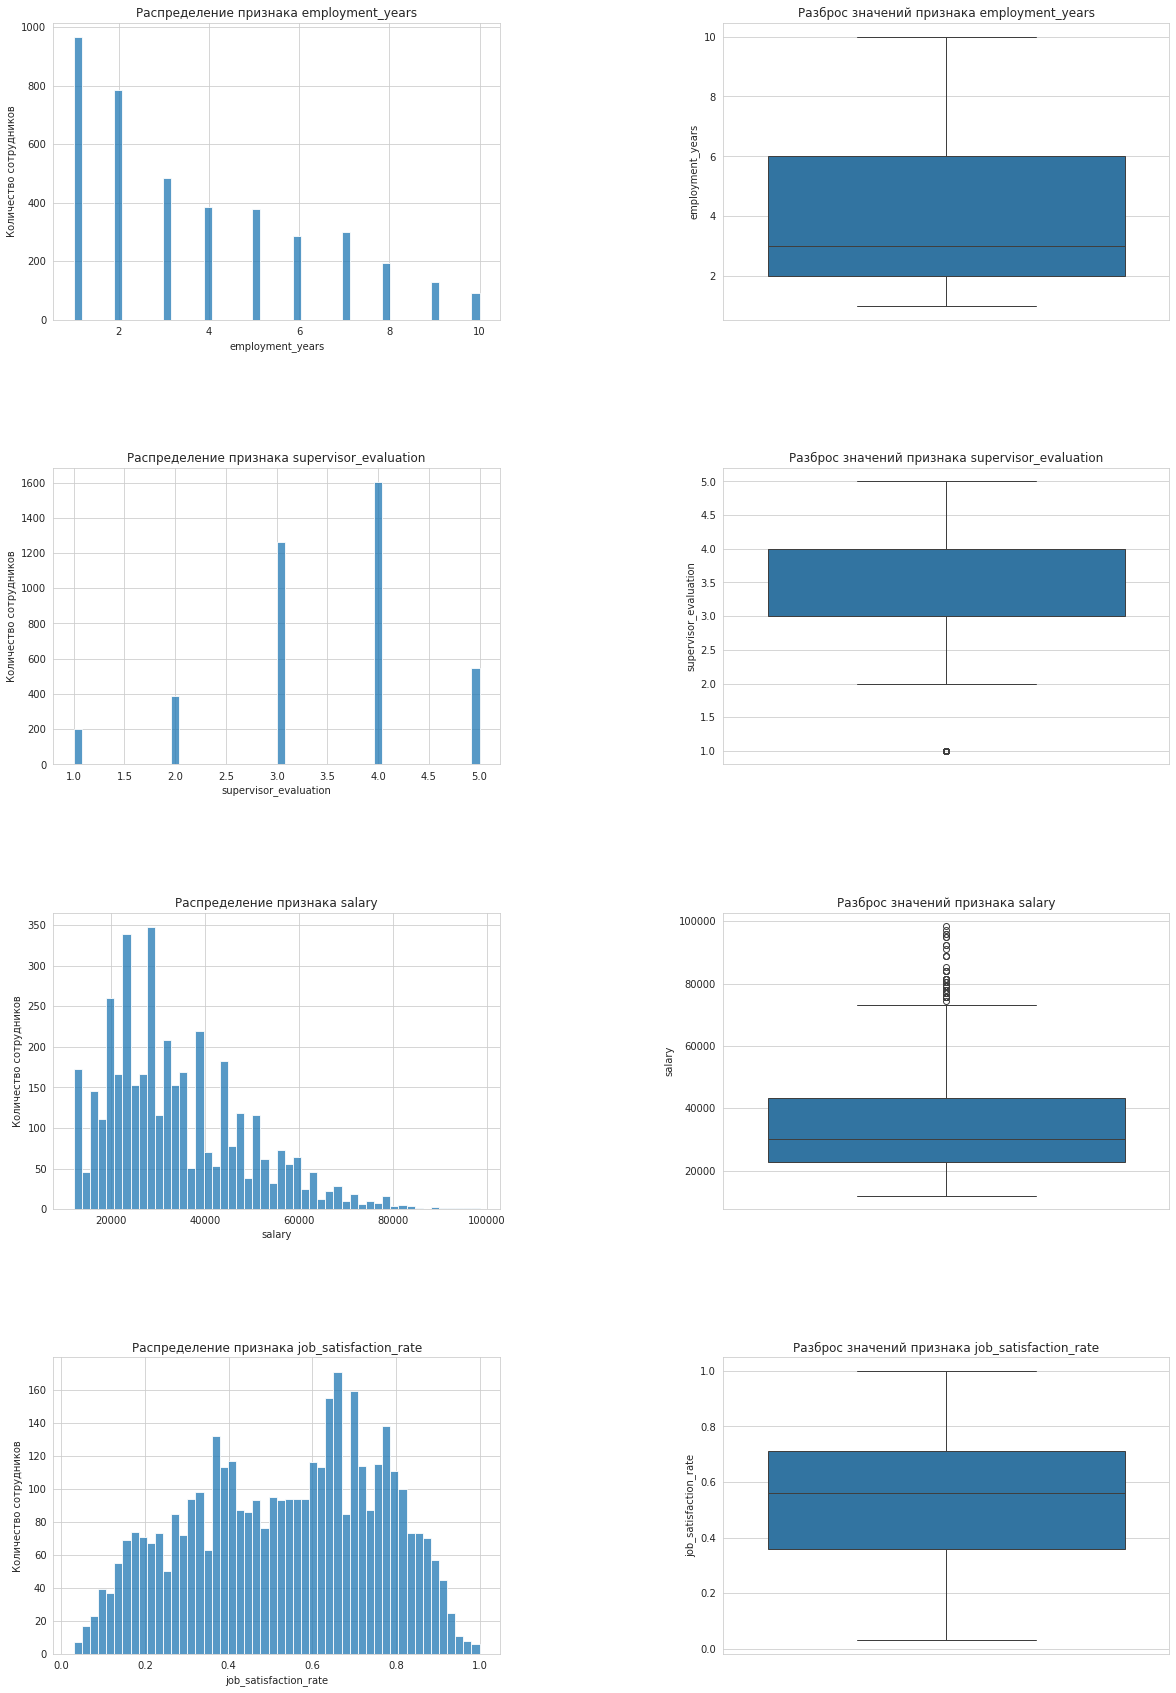

In [ ]:
display(train_jsr.describe())
num_cols = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']
i=0
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,30))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axe = axes.ravel()
for col in num_cols:
    sns.histplot(train_jsr[col], kde=False, bins=50, ax=axe[i])
    axe[i].set_title(f'Распределение признака {col}')
    axe[i].set_xlabel(col)
    axe[i].set_ylabel('Количество сотрудников')
    sns.boxplot(y=col, data=train_jsr, ax=axe[i+1])
    axe[i+1].set_title(f'Разброс значений признака {col}')
    axe[i+1].set_ylabel(col)
    axe[i+1].set_xticks([])
    sns.set_style("whitegrid")
    i+=2

Из распределений количественных признаков можно сделать следующие выводы:    
- Количество сотрудников уменьшается с каждым годом стажа. Максимум сотрудников работает в компании до 1-2 года, а минимум - 10 лет. Это следствие текучки кадров;       
- Большинство сотрудников оценены руководителем на 3-4 балла. Оценка руководителя - целое число, для нее есть всего 5 вариантов от 1 до 5, а значит это ранговая переменная. Диаграмма разброса отнесла оценку 1 к выбросам, но я бы не назвал его аномальным, просто таких сотрудников мало в датасете;    
- В распределении зарплаты (salary) наблюдается хвост выбросов за верхней границей. Это связано с наличием в датасете сотрудников с высокой зарплатой - экспертов и руководителей. Максимальное значение зарплаты в датасете - 98400, но ее нельзя назвать аномальным. Нам важно, чтобы модель умела работать с предсказаниями в том числе и для таких сотрудников, поэтому оставим данные как есть. Если же в тестовой выборке уровень зарплат будет значительно ниже, вернемся к вопросу исключения выбросов;    
- в распределении уровня удовлетворенности выбросов нет, однако заметны 2 пика - в районе 0.4 и около 0.6. Это может говорить о том, что есть крупные группы сотрудников, в неравной степени удовлетворенные работой в компании. Возможно, это разные подразделения с разными условиями работы.     

А теперь сравним распределение количественных на тренировочной с распределением на тестовой


In [ ]:
print('Характеристики распределения количественных признаков тренировочной выборки')
display(train_jsr.describe())
print('Характеристики распределения количественных признаков тестовой выборки')
display(test_jsr.describe())

Характеристики распределения количественных признаков тренировочной выборки


,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


Характеристики распределения количественных признаков тестовой выборки


,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,2000.000000,2000.000000,2000.000000,2000.00000
mean,3.666500,3.526500,34066.800000,0.54878
std,2.537222,0.996892,15398.436729,0.22011
min,1.000000,1.000000,12000.000000,0.03000
25%,1.000000,3.000000,22800.000000,0.38000
50%,3.000000,4.000000,30000.000000,0.58000
75%,6.000000,4.000000,43200.000000,0.72000
max,10.000000,5.000000,96000.000000,1.00000


Значения признаков находятся примерно в одном диапазоне, даже средние и медианы сходны. Выбросы в тренировочной оставляем без изменений.

#### Категориальные признаки

Теперь проанализируем распределение категориальных признаков.

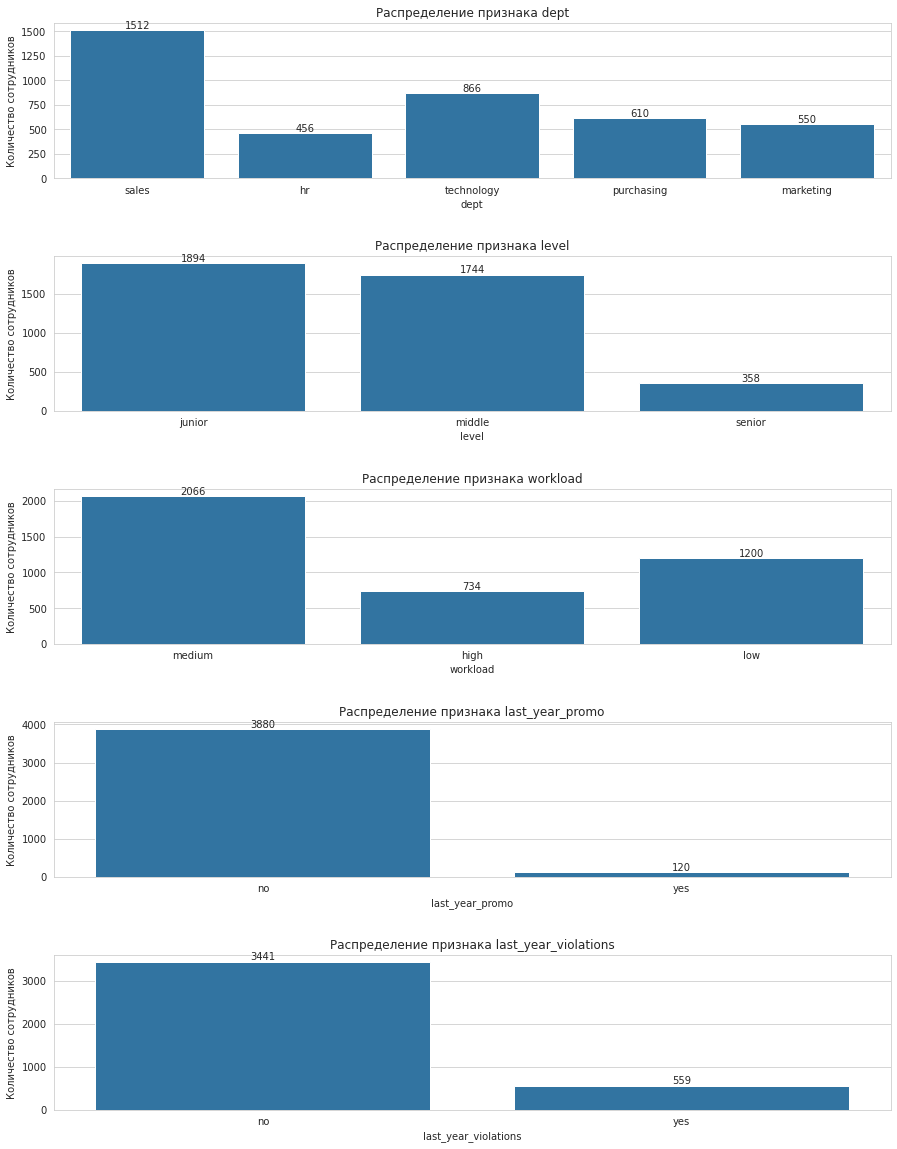

In [ ]:
cat_cols = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
i=0
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axe = axes.ravel()
for col in cat_cols:
    graf = sns.countplot(x=train_jsr[col], ax=axe[i])
    for container in graf.containers:
        graf.bar_label(graf.containers[0], fontsize=10)
    axe[i].set_title(f'Распределение признака {col}')
    axe[i].set_xlabel(col)
    axe[i].set_ylabel('Количество сотрудников')
    i+=1

По всем категориям сотрудники распределены неравномерно, по некоторым особенно.    

Так, в наибольшей степени в тренировочном датасете представлены сотрудники отдела продаж (sales), а в наименьшей - кадры (hr).   
Большая часть сотрудников занимает должность начального либо среднего уровня (junior и middle соответственно).
Половина сотрудников работает в режиме умеренной нагрузки (medium), а четверть с низкой нагрузкой (low).    

За последний год повышение получила очень малая часть сотрудников - всего 120 человек.    

Нарушивших трудовой договор тоже немного - 559 человек. Интересно, что здесь понимается под нарушением трудового договора. Любые нарушения дисциплины (включая опоздания), либо только серьезные? К сожалению, в описании данных эта информация отсутствует. Мы пока не знаем уровень влияния нарушений на увольняемость, но если тут есть значимая взаимосвязь, то интересно было бы провести анализ в разрезе серьезности нарушения.    

Перейдем к анализу корреляций между признаками.

#### Корреляционный анализ

Так как целевой у нас количественный, а распределение входных количественных нельзя назвать нормальным, используем коэффициент Спирмена. После этого оценим влияние категориальных на целевой при помощи коэффициента Фи. Итого построим 2 матрицы корреляции.

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
employment_years,1.000000,-0.001554,0.472688,0.218589
supervisor_evaluation,-0.001554,1.000000,0.003534,0.746608
salary,0.472688,0.003534,1.000000,0.126707
job_satisfaction_rate,0.218589,0.746608,0.126707,1.000000


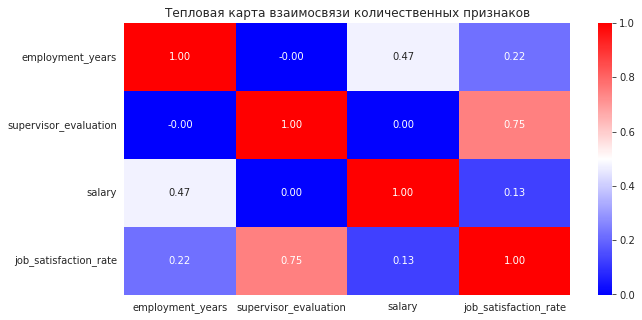

In [ ]:
display(train_jsr.corr(method='spearman'))
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(train_jsr.corr(method='spearman'), annot=True, fmt='.2f', cmap='bwr')
ax.set_title('Тепловая карта взаимосвязи количественных признаков')
None

А вот это итересно. На уровень удовлетворенности сотрудника очень сильно влияет оценка руководителя, причем зависимость прямая. Чем выше оценивает руководитель сотрудника, тем более удовлетворен сотрудник работой. Не исключаю, что возможна ситуация, когда через личную оценку руководитель транслирует сотруднику определенное отношение, тем самым формируя у сотрудника определенный уровень психологического комфорта либо дискомфорта на работе.     

А вот зарплата из всех количественных признаков в наименьшей степени влияет на удовлетворенность. Но, думаю, как таковой размер зарплаты не является показателем. Можно работать 10 лет на одной зарплате (пусть и высокой по меркам рынка) и чувствовать себя несчастным из-за отсутствия изменений и прогресса, а можно раз в 2 года расти по карьерной лестнице и получать удовольствие от увеличения дохода и процесса. Поэтому с финансовой точки зрения интересно было бы посмотреть влияние увеличения зарплаты (например .в результате индексации) на целевой, однако такого признака у нас нет. Конечно, есть признак last_year_promo, содержащий информацию о наличии повышения сотрудника в должности, однако увеличение зарплаты может быть связано не только с карьерным ростом.

Посмотрим теперь на влияние категориальных признаков. Коэффициент Фи рассчитаем по всему датасету.

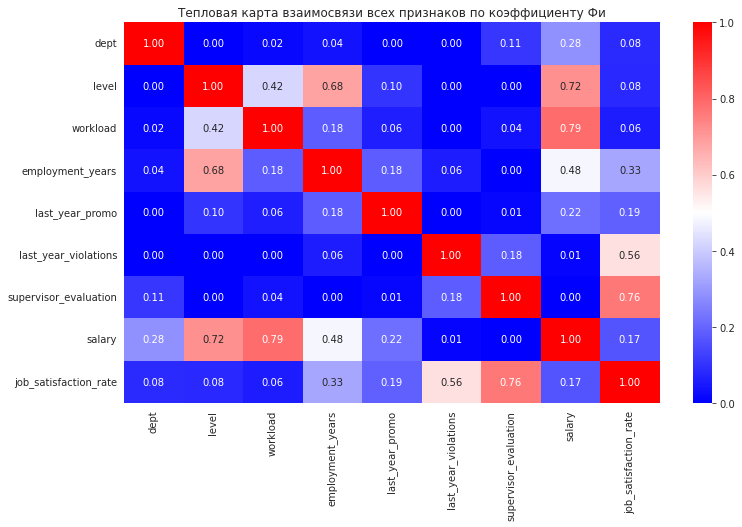

In [ ]:
interval_cols=['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(train_jsr.phik_matrix(interval_cols=interval_cols),
            annot=True, fmt='.2f', cmap='bwr')
ax.set_title('Тепловая карта взаимосвязи всех признаков по коэффициенту Фи')
None

Самый влиятельный признак - по-прежнему оценка руководителя. На 2-м месте - наличие нарушений трудового договора за последний год (last_year_violations). В какой-то мере характеристика отношений между сотрудником и руководителем. Именно руководитель фиксирует нарушения и проводит по ним работу с сотрудником. Однако, оценка руководителя и нарушения между собой связаны слабо. А значит наличие нарушений является не причиной, а следствием, даже определенным маркером неудовлетворенности сотрудником своей работой.    

После нарушений идет количество отработанных лет (employment_years). Интересно, каков характер этой взаимосвязи? Это посмотрим на графиках далее.    

Все остальные признаки влияют на удовлетворенность незначительно. Из чего следует, что на удовлетворенность работой в наибольшей мере влияют не условия труда, поавышения и рабочая нагрузка, а коммуникации между сотрудниками и руководителями. А первым сигналом о том, что сотрудник неудовлетворен, служит факт нарушения трудового договора.   

Проанализируем распределения всех входных признаков в зависимости от значений целевого. Сначала количественные.

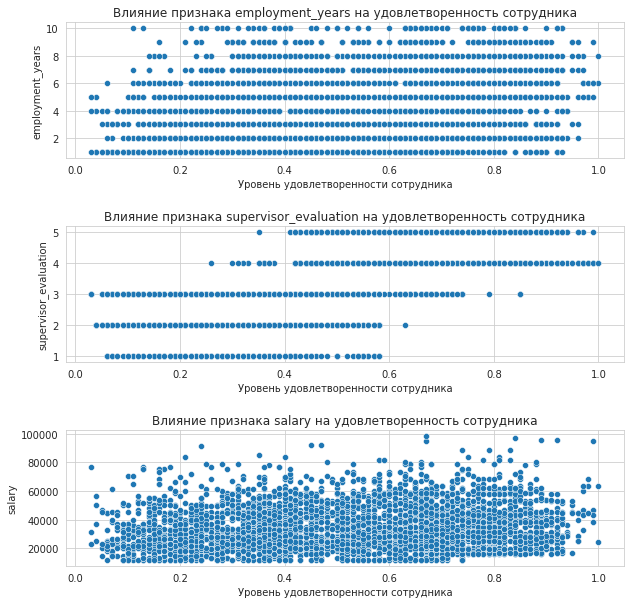

In [ ]:
num_cols = ['employment_years', 'supervisor_evaluation', 'salary']
i=0
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axe = axes.ravel()
for col in num_cols:
    sns.scatterplot(data=train_jsr, x='job_satisfaction_rate', y=col, ax=axe[i])
    axe[i].set_title(f'Влияние признака {col} на удовлетворенность сотрудника')
    axe[i].set_xlabel('Уровень удовлетворенности сотрудника')
    axe[i].set_ylabel(col)
    i+=1
None

Диаграмма рассеяния наглядно подтверждает выводы о влиянии оценки руководителя на удовлетворенность сотрудника. На 80% и выше удовлетворены своей работой те сотрудники, которые получили оценку руководителя 4 или 5. А вот у большинства сотрудников с оценками ниже 4 уровень удовлетворенности менее 0.5.    

Влияние количества лет в компании на удовлетворенность на диаграмме в явном виде не прослеживается.   

Посмотрим теперь распределение категориальных признаков.

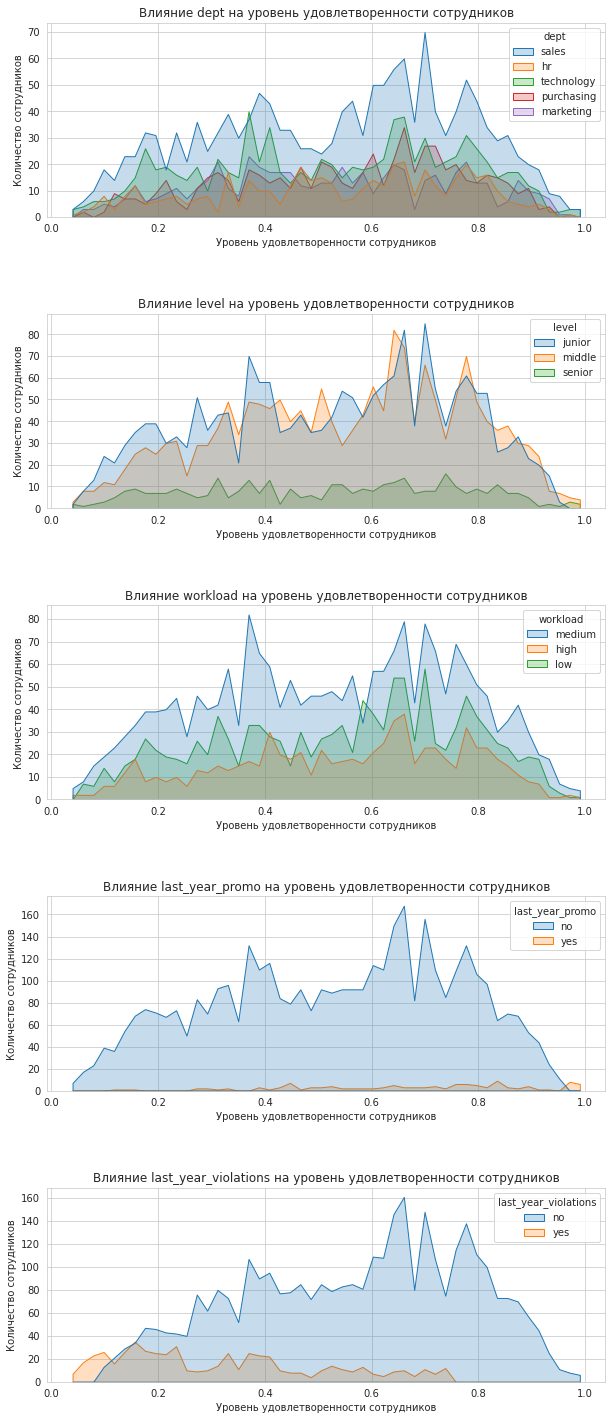

In [ ]:
cat_cols = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
i=0
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,25))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axe = axes.ravel()
for col in cat_cols:
    sns.histplot(x = 'job_satisfaction_rate', hue = col, data = train_jsr, bins = 50, element='poly',ax=axe[i])
    axe[i].set_title(f'Влияние {col} на уровень удовлетворенности сотрудников')
    axe[i].set_xlabel('Уровень удовлетворенности сотрудников')
    axe[i].set_ylabel('Количество сотрудников')
    i+=1

На 80% и выше удовлетворены работой сотрудники без каких-либо нарушений трудового договора за последний год. Ранее я предположил, что взаимосвязь между этими признаками обусловлена тем, что сотрудник нарушает трудовой договор вследствие неудовлетворенности своей работой. Таким образом, наличие нарушения можно расценивать как сигнал для компании и руководителя о том, что у сотрудника что-то не так.    

Все остальные диаграммы на первый взгляд не отражают ярко выраженную взаимосвязь между категориальными признаками и удовлетворенностью. Однако, стоит обратить внимание на наличие нескольких пиков в каждом из распределений. Возьмем, например, рабочую нагрузку (признак workload), значение medium. Есть пик удовлетворенности в районе 0.35 и похожий около 0.6-0.7. То есть количество работы одинаковое, а удовлетворенность разная. Или, например подразделение продаж (sales), тут тоже пик в районе 0.4, а второй около 0.7. Для остальных признаков также есть пики в районе указанных значений удовлетворенности. Предполагаю, что это определенные рабочие группы внутри подразделений, каждая со своим руководителем и психологическим климатом, которые оказывают существенное влияние на удовлетворенность.

#### Промежуточный вывод

Изучено распределение значений всех признаков, входящих в датасет. Аномальные значение не обнаружены, однако есть отдельные выбросы в зарплате (salary) и оценке руководителя (supervisor_evaluation). Данные выбросы не исключались, нам важно учесть их при построении модели, так как они отражают отдельные группы сотрудников, к тому же в тестовой выборке есть значения в том же диапазоне, что и выбросы.    

В распределении уровня удовлетворенности заметны 2 пика - в районе 0.4 и 0.6. Это может говорить о том, что есть крупные группы сотрудников, в неравной степени удовлетворенные работой в компании.    

Исходя из результатов корреляционного анализа признаков можно сделать вывод, что в наибольшей степени на удовлетворенность сотрудников влияет оценка руководителя (значение коэффициента корреляции 0.76). Предполагаю, что через личную оценку руководитель транслирует сотруднику определенное отношение, тем самым формируя у сотрудника определенный уровень психологического комфорта либо дискомфорта на работе.    

Также высока взаимосвязь между фактом нарушения трудового договора и уровнем удовлетворенности, однако в данном случае считаю, что нарушение является скорее следствием неудовлетворенности, нежели ее причиной. Для компании и руководителя факт нарушения может быть первым сигналом к тому, что сотрудник неудовлетворен условиями труда.    

Есть взаимосвязь между стажем и уровнем удовлетворенности (коэффициент 0.33), однако на графике, отображающем данную зависимость, не удалось найти какую-то явную закономерность.     

Условия труда (зарплата, повышения, загруженность, подразделение) незначительно влияют на удовлетворенность.    
Что касается зарплаты, считаю, что нужно смотреть ее в динамике, а не конкретную сумму. Например, наличие и сумму изменений зарплаты за последние 2 года.    

Также предложил бы детализировать подразделения до уровня рабочих групп. На всех графиках распределения целевого признака видно наличие нескольких пиков с разным уровнем удовлетворенности. Я предположил, что это зависит от подразделения, однако анализ удовлетворенности по подразделениям данное предположение не подтвердил. Возможно, это связано с тем, что сейчас мы видим только верхний уровень организационной структуры, а проблема с низким уровнем удовлетворенности наблюдается в конкретных рабочих группах. Но даже если это предположение неверно, детализация подразделений все равно поможет при разработке точечных мер для повышения уровня удовлетворенности.

### 1.4. Подготовка данных

Построим пайплайн для подготовки данных к модели. Для начала разделим тренировочную на входные признаки и целевой.

In [ ]:
x_train_jsr = train_jsr.drop('job_satisfaction_rate', axis=1)
y_train_jsr = train_jsr['job_satisfaction_rate']

Определим, какие признаки и как мы будем готовить.     

1. dept, last_year_promo, last_year_violations это категориальные признаки, их закодируем с помощью OneHotEncoder. В dept у нас есть пропуски, но так как признак незначительно влияет на целевой, заполним их модой с помощью SimpleImputer;    
2. level и workload это категориальные ранговые. Значение каждой последующей категории в них выше предыдущей. Поэтому используем OrdinalEncoder. В level и workload есть пропуски, но так как эти признаки тоже незначительно влияют на целевой, заполним пропуски модой при помощи SimpleImputer;     
3. Все остальные являются количественными, используем StandardScaler для стандартизации.    

Построим пайплайн.

In [ ]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

ohe_pipe = Pipeline([('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ohe', OneHotEncoder(drop='first'))])

ord_pipe = Pipeline([('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ord',  OrdinalEncoder(categories=[
                         ['junior', 'middle', 'senior'],
                         ['low', 'medium', 'high']], handle_unknown='use_encoded_value', unknown_value=np.nan)),
                     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)], remainder='passthrough')

print(data_preprocessor)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 ['dept', 'last_year_promo',
                                  'last_year_violations']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['junior',
                                                                              'middle',
                                                   

Пайплайн для подготовки данных построен.

### 1.5. Обучение модели и получение предсказания

#### Обучение и выбор модели

Целевой признак (job_satisfaction_rate) является количественным непрерывным, а значит мы решаем задачу регрессии. Для предсказания значения используем 2 модели, в каждой переберем ряд гиперпараметров.    

1. Линейная регрессия. Модель LinearRegression. Для этой модели нет гиперпараметров, которые можно перебрать, поэтому применим стандартные настройки.     
2. Дерево решений. Модель DecisionTreeRegressor. Переберем max_depth в диапазоне от 10 до 20 включительно, min_samples_split и min_samples_leaf в диапазоне от 2 до 5 включительно.    

Качество моделей оценим метрикой SMAPE (symmetric mean absolute percentage error), согласно требованию заказчика. Критерием успеха будет значение SMAPE меньше или равно 15 на тестовой выборке.    

Создадим метрику SMAPE.

In [ ]:
def smape(y_true, y_pred):
    return 1 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))*100)

scorer = make_scorer(smape, greater_is_better=False)

Дополним пайплайн обработки данных перебором моделей и их гиперпараметров, метрику SMAPE посчитаем на кросс-валидации.

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

RANDOM_STATE = 42

ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

ohe_pipe = Pipeline([('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ohe', OneHotEncoder(drop='first'))])

ord_pipe = Pipeline([('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ord',  OrdinalEncoder(categories=[
                         ['junior', 'middle', 'senior'],
                         ['low', 'medium', 'high']], handle_unknown='use_encoded_value', unknown_value=np.nan)),
                     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)], remainder='passthrough')

final_pipe = Pipeline([('preprocessor', data_preprocessor),
                       ('models', LinearRegression())])

param_grid = [
    {'models': [LinearRegression()]},
    {'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
     'models__max_depth': range(10,21),
     'models__min_samples_split': range(2,6),
     'models__min_samples_leaf': range(2,6)}]

grid = GridSearchCV(
    final_pipe,
    param_grid=param_grid,
    cv=5,
    scoring=scorer,
    n_jobs=-1)

grid.fit(x_train_jsr, y_train_jsr)

best_params = grid.best_params_
best_smape = round(grid.best_score_, 2) * (-1)

print(best_params)
print(best_smape)

{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 14, 'models__min_samples_leaf': 3, 'models__min_samples_split': 2}
14.29


Наилучший результат показало дерево решений с определенным набором гиперпараметров. Именно возможность перебора гиперпараметров позволила оптимально настроить данную модель под решение задачи предсказания уровня удовлетворенности. Однако, значения гиперпараметров меняются с каждым вызовом grid - это связано с тем, что при кросс-валидации используются разные составы тренировочной выборки. Для дальнейшей работы с признаками нам нужно получить лучшую модель без этапа обработки данных.

In [ ]:
model = DecisionTreeRegressor(random_state=RANDOM_STATE)

param_grid = [
    {'max_depth': range(9,21),
     'min_samples_split': range(2,6),
     'min_samples_leaf': range(2,6)}]

x_train_p = pd.DataFrame(
    data_preprocessor.fit_transform(x_train_jsr),
    columns=data_preprocessor.get_feature_names_out())

grid = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    scoring=scorer,
    n_jobs=-1)

grid.fit(x_train_p, y_train_jsr)

best_params = grid.best_params_
best_smape = round(grid.best_score_, 2) * (-1)
model1 = grid.best_estimator_

print(best_params)
print(best_smape)
print(model1)

{'max_depth': 14, 'min_samples_leaf': 3, 'min_samples_split': 2}
14.31
DecisionTreeRegressor(max_depth=14, min_samples_leaf=3, random_state=42)


Проверим результат работы модели на тестовой выборке заказчика.

#### Проверка работы модели на тестовых данных

Посмотрим, каким будет результат модели на тестовой выборке.

In [ ]:
target = test_jsr['job_satisfaction_rate']
test = test_jsr.drop('job_satisfaction_rate', axis=1)

test_p = pd.DataFrame(
    data_preprocessor.transform(test),
    columns=data_preprocessor.get_feature_names_out())

print('Значение smape на тестовых данных:', round(scorer(model1, test_p, target) * (-1), 2))

Значение smape на тестовых данных: 13.69


Значение smape попадает в целевой диапазон, а значит с задачей мы справились. Более того, значение smape на тестовой выборке не ухудшилось, а значит у нас не возникла проблема переобучения модели. Посмотрим распределение остатков.

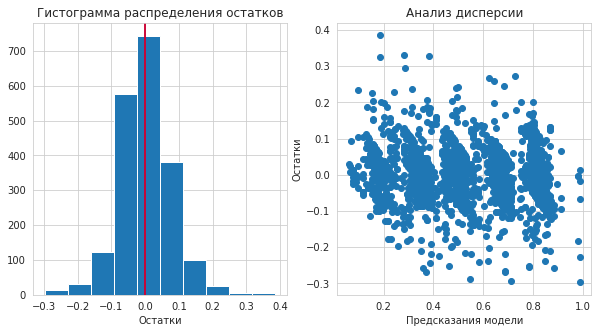

In [ ]:
predictions = model1.predict(test_p)
residuals = target - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].axvline(x=0, color='Blue')
axes[0].axvline(x=residuals.mean(), color='Red')
axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

На гистограмме среднее остатков не смещено, а значит модель не занижает и не завышает предсказания. На диаграмме рассеяния остатки распределились равномерно за исключением отдельных значений. Следовательно, модель работает устойчиво.

Попробуем улучшить прогноз. Поработаем с признаками. Оценим важность признаков методом feature importance.

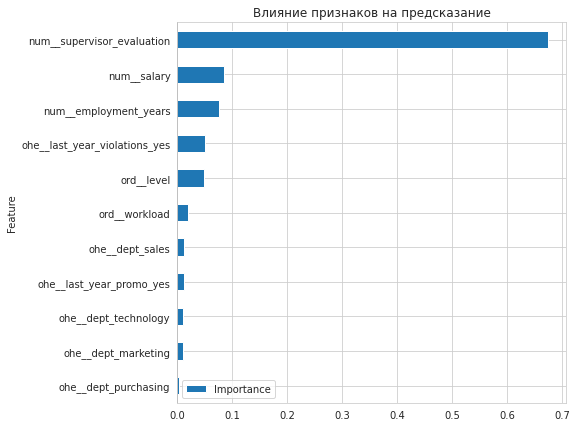

In [ ]:
feature_importances = pd.DataFrame(
    {
        'Feature': test_p.columns,
        'Importance': model1.feature_importances_
    })

feature_importances = feature_importances.sort_values(by='Importance')

feature_importances.plot(kind="barh", x='Feature', figsize=(9, 7))
plt.title('Влияние признаков на предсказание')
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Самым влиятельным признаком является оценка руководителя, но это мы уже выяснили на этапе корреляционного анализа. А вот наличие нарушений трудового договора (last_year_violations) переместилось со 2-го места на 4-е. Второе место заняла зарплата (salary), хотя на этапе корреляционного анализа мы не увидели сильной ее взаимосвязи с целевым. Следовательно, данный признак все же имеет значение. Подразделение (dept) оказывает минимальное влияние на результат предсказания.

Попробуем произвести отбор признаков методом SelectKBest.

In [ ]:
model1.fit(x_train_p, y_train_jsr)

print('Значение smape без отбора признаков:', round(scorer(model1, test_p, target) * (-1), 2))

results = []
for i in range(len(x_train_p.columns)):
    selector = SelectKBest(k=i+1)
    selector.fit(x_train_p, y_train_jsr)

    features_names = x_train_p.columns[selector.get_support(indices=True)]

    X_train_new = x_train_p[list(features_names)]
    X_test_new = test_p[list(features_names)]

    model1.fit(X_train_new, y_train_jsr)

    new_result = round(scorer(model1, X_test_new, target) * (-1), 2)

    results.append(new_result)

results.sort()
print('Значения smape при отборе признаков методом SelectKBest:')
print(results)

Значение smape без отбора признаков: 13.69
Значения smape при отборе признаков методом SelectKBest:
[13.69, 13.94, 14.03, 14.38, 15.9, 17.88, 18.45, 20.31, 22.05, 22.35, 24.03]


Превзойти изначальное значение метрики не удалось, а значит текущий набор признаков является оптимальным. Модель готова к предсказанию уровня удовлетворенности сотрудников.

### 1.6. Вывод

Наилучший результат предсказания уровня удовлетворенности сотрудников показала модель дерево решений (DecisionTreeRegressor). Благадаря широким возможностям подбора гиперпараметров модель была настроена под решение конкретной задачи, значение метрики SMAPE на тестовой выборке попало в целевой диапазон 15 или ниже.     

Также мы оценили вклад входных признаков в предсказание и модели и попробовали получить оптимальный набор методом SelectKBest. Однако, превзойти изначальное значение метрики не удалось, а значит для решения задачи требуется полный набор входных признаков.    

Перейдем к решению второй задачи.

## Задача 2. Предсказание увольнения сотрудника из компании

### 2.1. Загрузка данных

In [ ]:
train_q = pd.read_csv('/datasets/train_quit.csv')
test_q = pd.read_csv('/datasets/test_features.csv')
target_q = pd.read_csv('/datasets/test_target_quit.csv')

Изучим данные в каждой из выборок. Начнем с тренировочной.

In [ ]:
display(train_q.head())
train_q.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


4000 строк и 10 столбцов, содержание соответствует описанию данных пропусков нет.   

Тестовую с входными признаками проверять не будем - это та же самая тестовая, что и в первой задаче. А вот тестовую с целевым проверим.

In [ ]:
display(target_q.head())
target_q.info()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


2000 строк, данные соответствую описанию, пропуски отсутствуют. Объединим тестовые выборки.

In [ ]:
test_q = test_q.merge(target_q, on='id', how='left')
test_q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
 9   quit                   2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 171.9+ KB


Объединение прошло успешно. Новые пропуски не появились, следовательно сотрудники в тестовых выборках одни и те же.

#### Промежуточный вывод

Датасеты с информацией о сотрудниках успешно загружены и открыты. Информация в таблицах соответствует описанию данных, тип данных установлен верно. Есть отдельные пропуски в столбцах dept и level тестовой выборки, однако тестовая выборка та же самая, что и при решении первой задачи, поэтому пропуски в ней не стали неожиданностью.

### 2.2. Предобработка данных

На этапе открытия файлов с данными пропуски были обнаружены только в тестовой выборке, однако их мы уже изучили при решении задачи 1. Поэтому на пропусках останавливаться не будем, перейдем сразу к дубликатам.

#### Явные дубликаты

Проверим тренировочную и тестовую выборки на наличие полных дублей

In [ ]:
print('Количество полных дублей в таблице train_q:', train_q.duplicated().sum())
print('Количество полных дублей в таблице test_q:', test_q.duplicated().sum())

Количество полных дублей в таблице train_q: 0
Количество полных дублей в таблице test_q: 0


Полных дублей нет. Проверим дубли по id сотрудников.

In [ ]:
print('Количество дублей по id в таблице train_q:', train_q['id'].duplicated().sum())
print('Количество дублей по id в таблице test_q:', test_q['id'].duplicated().sum())

Количество дублей по id в таблице train_q: 0
Количество дублей по id в таблице test_q: 0


Сотрудники в выборках не повторяются.

#### Неявные дубликаты

Проверим столбцы с категориальными признаками на предмет наличия неявных дублей. Для этого выведем уникальные значения столбцов. Сначала тренировочная выборка.

In [ ]:
columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']
for col in columns:
    print(f'Значения переменной {col}')
    print(train_q[col].unique())

Значения переменной dept
['sales' 'purchasing' 'marketing' 'technology' 'hr']
Значения переменной level
['middle' 'junior' 'sinior']
Значения переменной workload
['high' 'medium' 'low']
Значения переменной last_year_promo
['no' 'yes']
Значения переменной last_year_violations
['no' 'yes']
Значения переменной quit
['no' 'yes']


Неявных дублей нет, но есть ошибка в одной из должностей. Исправим

In [ ]:
train_q.loc[train_q['level'] == 'sinior', 'level'] = 'senior'
print(train_q['level'].unique())

['middle' 'junior' 'senior']


Проведем аналогичную проверку для тестовой выборки. Мы уже знаем, что там будет ошибка в должности, а таже пустые значения. Но на всякий случай посмотрим еще раз, кроме того нужно проверить целевой quit.

In [ ]:
columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']
for col in columns:
    print(f'Значения переменной {col}')
    print(test_q[col].unique())

Значения переменной dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Значения переменной level
['junior' 'middle' 'sinior' nan]
Значения переменной workload
['medium' 'low' 'high' ' ']
Значения переменной last_year_promo
['no' 'yes']
Значения переменной last_year_violations
['no' 'yes']
Значения переменной quit
['no' 'yes']


В целевом неявных дублей и пустых строк нет. Все остальные проблемы нам известны по задаче 1. Исправим должность, а также превратим пустые строки в пропуски.

In [ ]:
test_q['dept'] = test_q['dept'].replace(r'^\s*$', np.nan, regex=True)
test_q['workload'] = test_q['workload'].replace(r'^\s*$', np.nan, regex=True)
test_q.loc[test_q['level'] == 'sinior', 'level'] = 'senior'
print(test_q['dept'].unique())
print(test_q['workload'].unique())
print(test_q['level'].unique())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
['medium' 'low' 'high' nan]
['junior' 'middle' 'senior' nan]


#### Промежуточный вывод

Проведена предобработка данных.

В тренировочной выборке пропуски отсутствуют.

В тестовой выборке есть отдельные пропуски в столбцах dept и level. При подготовке данных для модели они будут заполнены модой при помощи SimpleImputer.

При анализе неявных дубликатов дополнительно обнаружены 2 пробела в тестовой выборке - один в столбце dept, второй в workload. Данные пробелы приравнены к пропускам, изменены на NaN, обработка их также будет произведена при помощи SimpleImputer.

Все таблицы проверены на предмет наличия дубликатов. Явные дубли не обнаружены.

В обеих выборках обнаружено неверное написание одной из должностей. Было указано 'sinior', исправлено на 'senior'

### 2.3. Исследовательский анализ данных

Первая часть исследовательского анализа будет аналогичной анализу в задаче 1.    
1. Сначала подробно изучим распределение значений количественных признаков тренировочной выборки    
2. Тестовую подробно анализировать не будем, однако проверим характеристики распределения количественных, сравним с тренировочной  
3. Посмотрим распределение категориальных для тренировочной. Тестовую проверять не будем, так как она не нужна для обучения модели, а соответствие категорий в тренировочной и тестовой мы проверили на этапе предоработки данных.         
4. Построим матрицу корреляции, определим, какие признаки в наибольшей степени влияют на целевой. Проанализируем распределение значений количественных и категориальных с учетом целевого.    

Для решения текущей задачи дополним этот план еще 2 пунктами:    
5. Исходя из распределения количественных признаков составим портрет уволившегося сотрудника     
6. Оценим влияние уровня удовлетворенности сотрудника на увольнение.    

На текущем этапе превратим id сотрудника в индекс, чтобы он не мешал при анализе.

In [ ]:
train_q = train_q.set_index('id')
display(train_q.head())
test_q = test_q.set_index('id')
display(test_q.head())

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no
686555,hr,junior,medium,1,no,no,4,30000,no
467458,sales,middle,low,5,no,no,4,19200,no
418655,sales,middle,low,6,no,no,4,19200,no
789145,hr,middle,medium,5,no,no,5,40800,no


#### Количественные признаки

,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


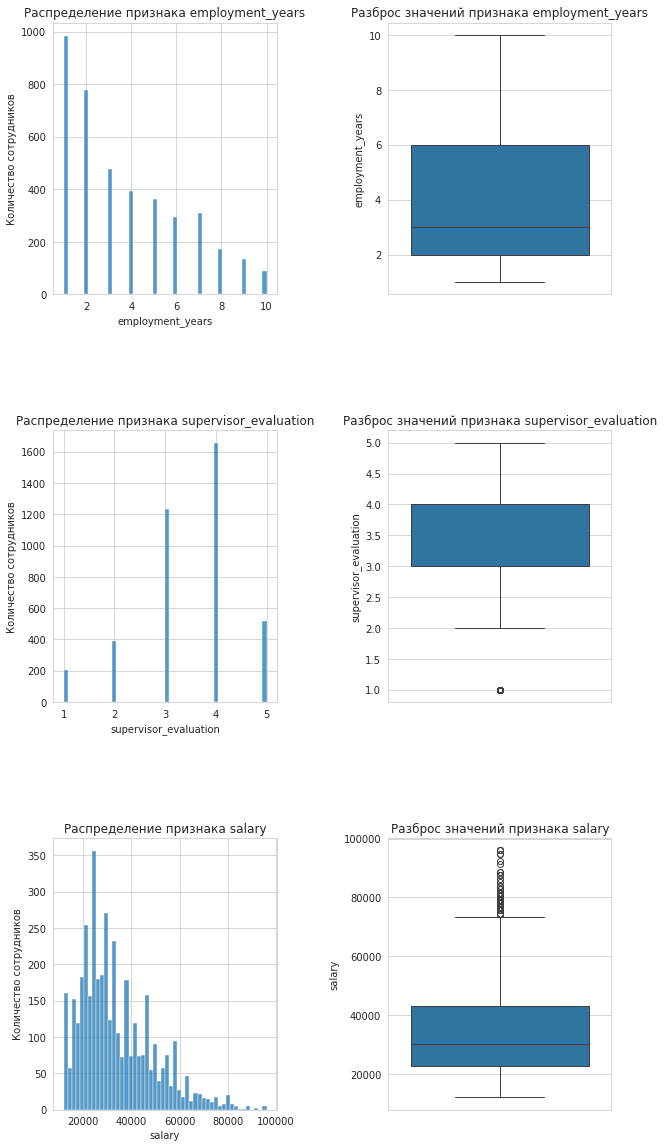

In [ ]:
display(train_q.describe())
num_cols = ['employment_years', 'supervisor_evaluation', 'salary']
i=0
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axe = axes.ravel()
for col in num_cols:
    sns.histplot(train_q[col], kde=False, bins=50, ax=axe[i])
    axe[i].set_title(f'Распределение признака {col}')
    axe[i].set_xlabel(col)
    axe[i].set_ylabel('Количество сотрудников')
    sns.boxplot(y=col, data=train_q, ax=axe[i+1])
    axe[i+1].set_title(f'Разброс значений признака {col}')
    axe[i+1].set_ylabel(col)
    axe[i+1].set_xticks([])
    sns.set_style("whitegrid")
    i+=2

Распределение количественных очень похоже на то, что мы уже видели на аналогичном этапе при решении задачи 1. В основном выводы те же:     
- Количество сотрудников уменьшается с каждым годом стажа. Максимум сотрудников работает в компании до 1-2 года, а минимум - 10 лет. Это следствие текучки кадров;       
- Большинство сотрудников оценены руководителем на 3-4 балла. Оценка руководителя - целое число, для нее есть всего 5 вариантов от 1 до 5, а значит это ранговая переменная. Диаграмма разброса отнесла оценку 1 к выбросам, но я бы не назвал его аномальным, просто таких сотрудников мало в датасете;    
- В распределении зарплаты (salary) наблюдается хвост выбросов за верхней границей. Это связано с наличием в датасете сотрудников с высокой зарплатой - экспертов и руководителей. Максимальное значение зарплаты в датасете - 96000. Как и при решении задачи 1 нам важно, чтобы модель умела работать с предсказаниями в том числе для сотрудников с высокой зарплатой, поэтому пока оставим данные как есть. Если в тестовой выборке уровень зарплат будет значительно ниже, вернемся к вопросу исключения выбросов;    

Сравним распределение количественных на тренировочной с распределением на тестовой

In [ ]:
print('Характеристики распределения количественных признаков тренировочной выборки')
display(train_q.describe())
print('Характеристики распределения количественных признаков тестовой выборки')
display(test_q.describe())

Характеристики распределения количественных признаков тренировочной выборки


,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


Характеристики распределения количественных признаков тестовой выборки


,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


Значения признаков находятся примерно в одном диапазоне, средние и медианы сходны. Выбросы в тренировочной оставляем без изменений.

#### Категориальные признаки

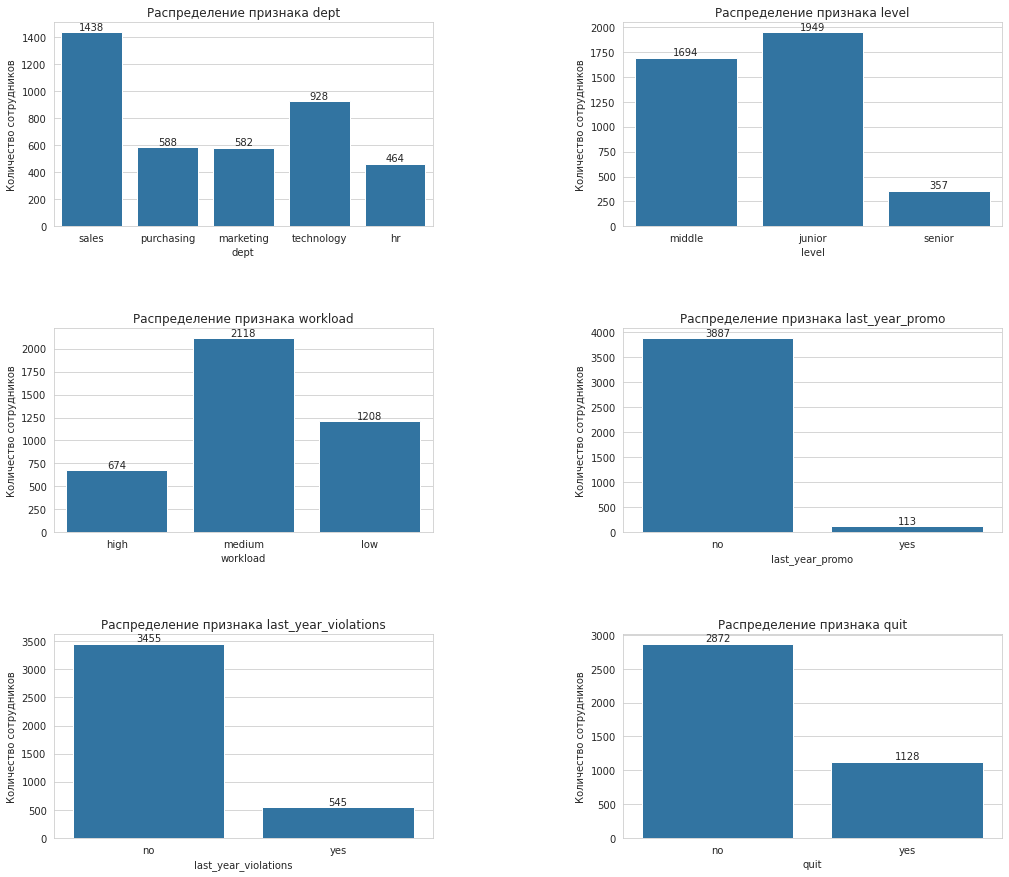

In [ ]:
cat_cols = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']
i=0
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(17,15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axe = axes.ravel()
for col in cat_cols:
    graf = sns.countplot(x=train_q[col], ax=axe[i])
    for container in graf.containers:
        graf.bar_label(graf.containers[0], fontsize=10)
    axe[i].set_title(f'Распределение признака {col}')
    axe[i].set_xlabel(col)
    axe[i].set_ylabel('Количество сотрудников')
    i+=1

Распределение категориальных также напоминает аналогичное из задачи 1. Значения категорий распределены неравномерно.    

Уволившихся чуть более четверти от всей тренировочной выборки.

#### Корреляционный анализ

Целевой признак quit является категориальным, а поэтому взаимосвязь между признаками будет оценивать при помощь коэффициента Фи.

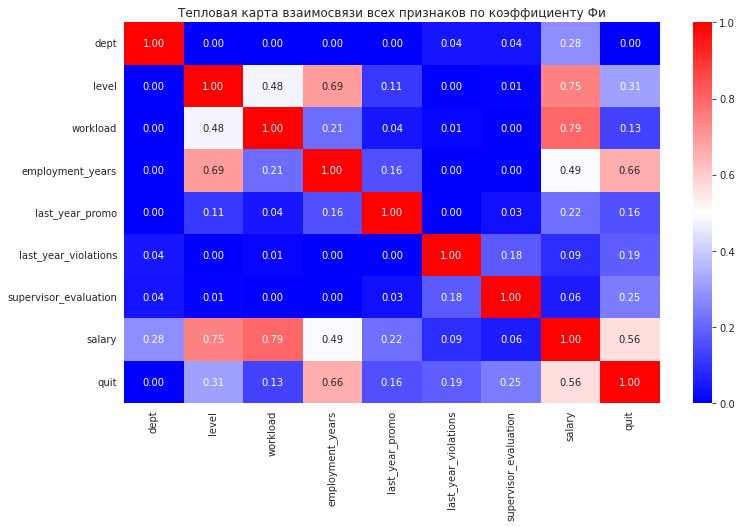

In [ ]:
interval_cols=['employment_years', 'supervisor_evaluation', 'salary']
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(train_q.phik_matrix(interval_cols=interval_cols),
            annot=True, fmt='.2f', cmap='bwr')
ax.set_title('Тепловая карта взаимосвязи всех признаков по коэффициенту Фи')
None

В наибольшей степени на увольнение влияет количество лет, отработанных в компании. Интересен характер взаимосвязи. Тут одно из двух - либо сотрудники со временем выгорают и увольняются, либо покидают компанию в первые годы. Это выясним далее. На 2-м месте по влиянию находится зарплата (salary), коэффициент корреляции равен 0.56. Что интересно, на зарплату очень сильно влияют должность (level) и нагрузка (workload), но при этом с целевым у данных признаков связь слабая.    

Проанализируем распределения всех входных признаков в зависимости от значений целевого. Сначала количественные.

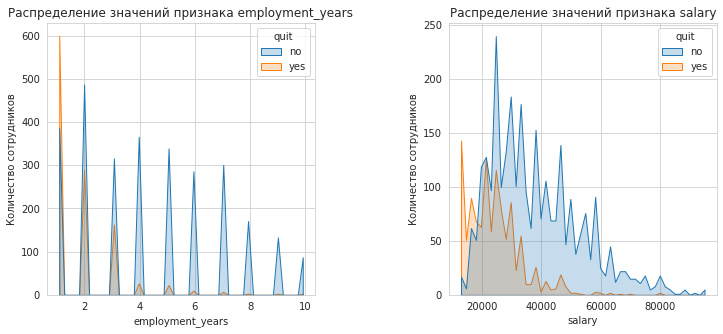

In [ ]:
num_cols = ['employment_years', 'salary']
i=0
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axe = axes.ravel()
for col in num_cols:
    sns.histplot(x = col, hue = 'quit', data = train_q, bins = 50, element='poly',ax=axe[i])
    axe[i].set_title(f'Распределение значений признака {col}')
    axe[i].set_ylabel('Количество сотрудников')
    i+=1

Большинство сотрудников увольняются в первые годы работы в компании. Из графика видно, что чаще остальных компанию покидают новички, т.е. проработавшие до 1 года. Следовательно, может быть проблема с адаптацией либо с высокой рабочей нагрузкой. С каждым последующим годом вероятность увольнения падает, т.е. люди адаптируются к условиям компании.    

Что касается зарплаты, то наибольшее количество уволившихся получало зарплату ниже среднего по компании. Скорее всего это начинающие специалисты. А вот причина их увольнения может быть одна из двух - либо зарплата на входе в компанию ниже среднерыночной, либо в компании есть проблемы с адаптацией новичков.   

Посмотрим распределение категориальных признаков.

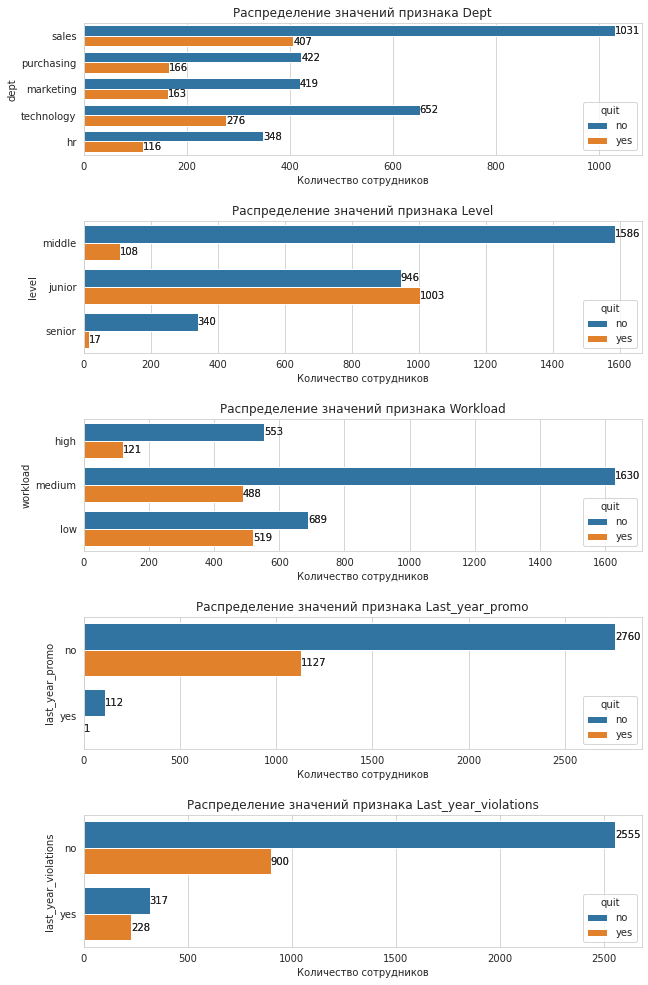

In [ ]:
cat_cols = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
i=0
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,17))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axe = axes.ravel()
for col in cat_cols:
    graf = sns.countplot(y = col, hue = 'quit', data = train_q, orient='h', ax=axe[i])
    for container in graf.containers:
        graf.bar_label(graf.containers[0], fontsize=10)
    for container in graf.containers:
        graf.bar_label(graf.containers[1], fontsize=10)
    axe[i].set_title(f'Распределение значений признака {col.capitalize()}')
    axe[i].set_xlabel('Количество сотрудников')
    i+=1

Вот какие выводы можно сделать из распределений категориальных признаков:
- Предположение о текучке среди новичков подтверждается. Наибольшее количество уволившихся работало на должности junior. Более того, доля уволившихся с данной должности выше, чем доля оставшихся.    
- Для большинства уволившихся характерна низкая рабочая нагрузка.  А вот при высокой нагрузке увольняется мало кто. Полагаю, что напрямую нагрузка не влияет на увольнение, тем более что матрица корреляции не выявила сильной взаимосвязи между этими признаками, скорее это результат влияния нагрузки на должность и зарплату.    
- Интересно, что среди получивших повышении уволившихся практически нет. А значит продвижение сотрудника по карьерной лестнице - хороший инструмент для удержания сотрудника. Однако применять его следует аккуратно и до того, как сотрудник примет решение об увольнении. Если мы будем удерживать увольняющихся сотрудников повышением, они могут к этому привыкнуть и в дальнейшем станут прибегать к шантажу увольнением с целью улучшения условий труда.    
- Доля нарушающих трудовой договор среди уволившихся выше, чем среди оставшихся. Ранее, при анализе уровня удовлетворенности сотрудников, мы говорили о том, что нарушение может служить сигналом о том, что сотрудник неудовлетворен работой в компании. То же самое можно сказать и об увольнении.    
- В разрезе подразделений не выявлено явной взаимосвязи с увольнениями. Во всех подразделениях текучка примерно одинаковая. В sales, purchasing и marketing уволились 28%, в technology почти 30%, в hr 25%.

#### Портрет уволившегося сотрудника

Обобщим результаты исследовательского анализа и составим портрет уволившегося сотрудника:     

1. Уволившийся сотрудник проработал в компании от 1 до 3 лет, при этом в первый год вероятность увольнения особенно высока.    
2. Должность уволившегося сотрудника - junior. Это логично дополняет предыдущий вывод.    
3. Зарплата уволившегося сотрудника ниже средней по компании.    
4. Исходя из выводов 1-3 можно сказать, что наиболее высокая текучка наблюдается среди новых сотрудников.    
5. Уровень рабочей нагрузки среди уволившихся сотрудников оценивается как средний или низкий. Среди сотрудников с низким уровнем нагрузки доля увольнений самая высокая.    
6. Уволившийся сотрудник не получал повышение в последний год.
7. Среди уволившихся сотрудников высока доля нарушений трудового договора.    
8. Наибольшее количество уволившихся сотрудников работало в подразделении продаж (sales), однако это связано с тем, что в данном подразделении самый большой штат. В целом по компании доли увольняющихся примерно одинаковы во всех подразделениях. А конкретнее, в sales, purchasing и marketing уволились 28%, в technology почти 30%, в hr 25%.

Таким образом, под угрозой неожиданного увольнения находятся новички. Текучка среди них может быть вызвана неконкуретными условиями на рынке труда (особенно, в части зарплаты), либо недостаточно эффективным процессом адаптации в компании.    

Аналитики заказчика утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение.

#### Анализ влияния уровня удовлетворенности работой на увольнение

Проанализируем взаимосвязь между удовлетворенностью и увольнением на тестовой выборке - для нее как раз известны значения обоих целевых признаков. Увольнение в тестовую уже добавлено, добавим уровень удовлетворенности.

In [ ]:
target_jsr = target_jsr.set_index('id')
test_q_jsr = test_q.join(target_jsr, how='left')
display(test_q_jsr.head())

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no,0.79
686555,hr,junior,medium,1,no,no,4,30000,no,0.72
467458,sales,middle,low,5,no,no,4,19200,no,0.64
418655,sales,middle,low,6,no,no,4,19200,no,0.60
789145,hr,middle,medium,5,no,no,5,40800,no,0.75


Посмотрим матрицу корреляции по коэффициенту Фи.

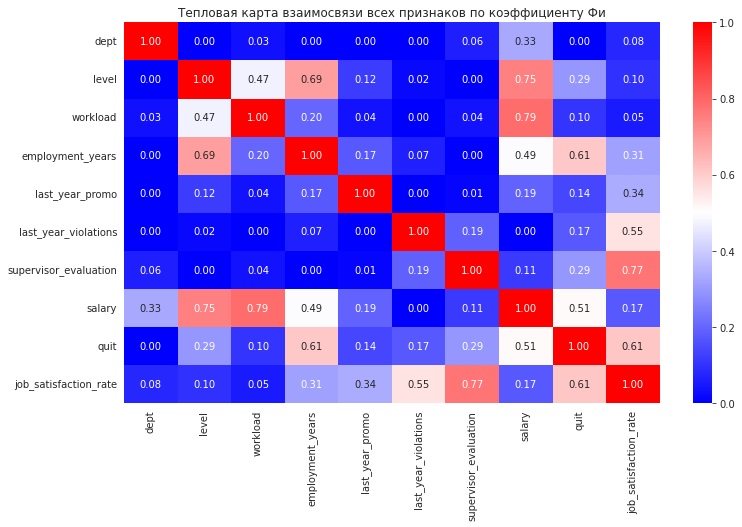

In [ ]:
interval_cols=['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(test_q_jsr.phik_matrix(interval_cols=interval_cols),
            annot=True, fmt='.2f', cmap='bwr')
ax.set_title('Тепловая карта взаимосвязи всех признаков по коэффициенту Фи')
None

Действительно, уровень удовлетворенности - один из самых значимых признаков, коэффициент взаимосвязи такой же, как и у количества лет в компании. Посмотрим распределение данного признака в разрезе увольнений.

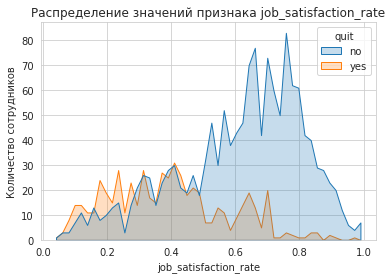

In [ ]:
sns.histplot(x = 'job_satisfaction_rate', hue = 'quit', data = test_q_jsr, bins = 50, element='poly')
plt.title('Распределение значений признака job_satisfaction_rate')
plt.ylabel('Количество сотрудников')
None

Взаимосвязь между признаками хорошо видна на графике. Чем выше уровень удовлетворенности, тем меньше увольнений. Также на графике есть условная граница. При уровне удовлетворенности до 0.5 количество уволившихся и оставшихся в компании примерно одинаково, а вот свыше 0.5 увольнения падают, а количество оставшихся в компании растет.

Но эти выводы мы делаем на основании графика. Проверим значимость различий статистическим тестом. Сформулируем гипотезы. Нулевая будет заключаться в том, что нет различий в уровне удовлетворенности между уволившимися и оставшимися сотрудниками. Соответственно, альтернативная - у уволившихся уровень удовлетворенности ниже.

In [ ]:
alpha = 0.01
quit_yes = test_q_jsr.query('quit == "yes"')['job_satisfaction_rate']
quit_no = test_q_jsr.query('quit == "no"')['job_satisfaction_rate']
results = st.ttest_ind(quit_yes, quit_no, equal_var=False, alternative='less')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.3854314015771867e-101
Отвергаем нулевую гипотезу


t-тест показал, что стоит отвергнуть нулевую гипотезу в пользу альтернативной. Следовательно, уровень удовлетворенности у уволившихся сотрудников действительно ниже, чем у оставшихся

#### Промежуточный вывод

Изучено распределение значений всех признаков, входящих в датасет. Аномальные значение не обнаружены, однако есть отдельные выбросы в зарплате (salary) и оценке руководителя (supervisor_evaluation). Данные выбросы не исключались, нам важно учесть их при построении модели, так как они отражают отдельные группы сотрудников, к тому же в тестовой выборке есть значения в том же диапазоне, что и выбросы.    

На основании распределения значений всех признаков, а также исходя из результатов корреляционоого анализа, сформирован портрет уволившегося сотрудника. Это новичок, либо начинающий специалист, проработавший до 3 лет с зарплатой ниже среднего по компании, подробные характеристики перечислены в соответствующем разделе исследования, а также будут отражены в итоговом выводе.   

Обнаружено, что на увольнение влияет уровень удовлетворенности сотрудника работой в компании. Уровень удовлетворенности у уволившихся сотрудников ниже, чем у оставшихся, проверка t-тестом это подтверждает.

### 2.4. Добавление нового входного признака

На предыдущем этапе мы определили, что уровень удовлетворенности влияет на увольнение.   

Добавим уровень удовлетворенности в тренировочную выборку. В отличие от тестовой реальные значения данного признака нам неизвестны, поэтому воспользуемся моделью, построенной в ходе решения задачи 1, для предсказания уровня удовлетворенности.

In [ ]:
train_q_jsr = train_q.drop('quit', axis=1)

train_q_jsr = pd.DataFrame(
    data_preprocessor.transform(train_q_jsr),
    columns=data_preprocessor.get_feature_names_out())

preds = model1.predict(train_q_jsr)

train_q['job_satisfaction_rate'] = preds

train_q.info()
display(train_q.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   4000 non-null   object 
 1   level                  4000 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   quit                   4000 non-null   object 
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 472.8+ KB


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.648000
814010,sales,junior,medium,2,no,no,4,27600,no,0.821905
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.337500
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.350000
910140,marketing,junior,medium,2,no,no,5,25200,no,0.812500


Новый входной признак в тренировочную выборку добавлен.

### 2.5. Подготовка данных

Построим пайплайн для подготовки данных к модели. За основу возьмем пайплайн, использованный при решении задачи 1, дополним его новым входным признаком.

In [ ]:
ohe_columns2 = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns2 = ['level', 'workload']
num_columns2 = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

ohe_pipe2 = Pipeline([('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ohe', OneHotEncoder(drop='first'))])

ord_pipe2 = Pipeline([('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ord',  OrdinalEncoder(categories=[
                         ['junior', 'middle', 'senior'],
                         ['low', 'medium', 'high']], handle_unknown='use_encoded_value', unknown_value=np.nan)),
                     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

data_preprocessor2 = ColumnTransformer(
    [('ohe', ohe_pipe2, ohe_columns2),
     ('ord', ord_pipe2, ord_columns2),
     ('num', StandardScaler(), num_columns2)], remainder='passthrough')

print(data_preprocessor2)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 ['dept', 'last_year_promo',
                                  'last_year_violations']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['junior',
                                                                              'middle',
                                                   

Пайплайн для подготовки данных построен, перейдем к разработке и выбору модели.

### 2.6. Обучение модели

#### Обучение и выбор модели

Наша задача - подобрать модель, наиболее точно предсказывающую одно из двух значений признака quit. Это задача бинарной классификации.    

Выбирать будем между 4 моделями: стандартной логистической регрессией, методом опорных векторов (SVM), методом k-ближайших соседей (kNN) и деревом решений. Для каждой из моделей также реализуем подбор гиперпараметров.

**Логистическая регрессия**. Используем лассо и ридж-регуляризации и для лассо переберем значения силы регуляризации от 1 до 4 включительно.    
**Метод опорных веторов (SVM)**. Переберем все 4 варианта ядер, для полиномиального переберем значения ядер от 1 до 6 включительно.    
**Метод k-ближайших соседей (kNN)**. Переберем количество соседей от 2 до 10 включительно.    
**Дерево решений**. Переберем max_depth, min_samples_split и min_samples_leaf в диапазоне от 2 до 5 включительно.    

Обработчик входных признаков у нас уже готов, построим итоговый пайплайн и осуществим перебор моделей и их гиперпараметров. Лучшую модель выберем на основании значения метрики ROC_AUC, согласно требованию заказчика.

In [ ]:
x_train_q = train_q.drop('quit', axis=1)
y_train_q = train_q['quit']

final_pipe2 = Pipeline([('preprocessor', data_preprocessor2),
                        ('models', LogisticRegression(random_state=RANDOM_STATE))])

param_grid = [
    {'models': [LogisticRegression(random_state=RANDOM_STATE, max_iter=500, solver='saga', penalty='l1')],
     'models__C': range(1,5)},
    {'models': [LogisticRegression(random_state=RANDOM_STATE, penalty='l2')]},
    {'models': [SVC(random_state=RANDOM_STATE)],
     'models__kernel': ['linear', 'sigmoid', 'rbf']},
    {'models': [SVC(random_state=RANDOM_STATE, kernel='poly')],
     'models__degree': range(1,7)},
    {'models': [KNeighborsClassifier()],
     'models__n_neighbors': range(2,11)},
    {'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
     'models__max_depth': range(2,6),
     'models__min_samples_split': range(2,6),
     'models__min_samples_leaf': range(2,6)}]

grid2 = GridSearchCV(
    final_pipe2,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1)

grid2.fit(x_train_q, y_train_q)

best_params = grid2.best_params_
best_metric = round(grid2.best_score_, 2)

print('Лучшие параметры:', best_params)
print('Лучшее значение roc_auc:', best_metric)

Лучшие параметры: {'models': SVC(kernel='poly', random_state=42), 'models__degree': 3}
Лучшее значение roc_auc: 0.93


Лучше остальных с задачей справилась модель метод опорных векторов с полиномиальным ядром 3-й степени. Значение метрики превысило целевой показатель 0.91. Это хороший результат. Теперь необходимо проверить работу модели на тестовой выборке заказчика. Но сначала достанем модель из пайплайна для удобства дальнейшей работы.

In [ ]:
model = SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)

param_grid = [
    {'degree': range(1,7)}]

x_train_p2 = pd.DataFrame(
    data_preprocessor2.fit_transform(x_train_q),
    columns=data_preprocessor2.get_feature_names_out())

grid2 = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1)

grid2.fit(x_train_p2, y_train_q)

best_params = grid2.best_params_
best_metric = round(grid2.best_score_, 2)
model2 = grid2.best_estimator_

print(best_params)
print(best_metric)
print(model2)

{'degree': 3}
0.93
SVC(kernel='poly', probability=True, random_state=42)


#### Проверка работы модели на тестовых данных

Проверим результат работы модели на тестовой выборке. Критерий успеха - значение ROC_AUC больше или равное 0.91. Исключим целевой из выборки.

In [ ]:
true_q = test_q_jsr['quit']
test2 = test_q_jsr.drop('quit', axis=1)

display(true_q.head())
display(test2.head())

id
485046    no
686555    no
467458    no
418655    no
789145    no
Name: quit, dtype: object

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


In [ ]:
test_p2 = pd.DataFrame(
    data_preprocessor2.transform(test2),
    columns=data_preprocessor2.get_feature_names_out())

print('Значение roc_auc на тестовых данных:', round(roc_auc_score(true_q, model2.predict_proba(test_p2)[:,1]), 2))

Значение roc_auc на тестовых данных: 0.92


Значение метрики снизилось на 0.1, однако данное снижение незначительно, поэтому можно сказать, что проблемы переобучения у нас нет. Значение ROC_AUC превышает 0.91, а значит поставленную цель мы достигли.      

Оценим вклад признаков в предсказания модели. Метод feature_importance с SVM не работает, поэтому используем permutation_importance.

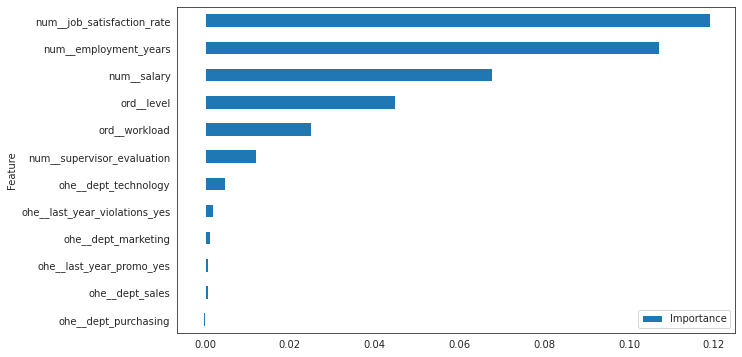

In [ ]:
result = permutation_importance(model2, test_p2, true_q, scoring='roc_auc')

feature_importance = pd.DataFrame({'Feature': test_p2.columns, 'Importance': result['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
None

В основном график повторяет то, что мы видели на этапе корреляционного анализа. В наибольшей степень на результат влияют уровень удовлетворенности, количество отработанных лет и зарплата. Причем влияние удовлетворенности выше влияния стажа (на этапе корреляционного анализа коэффициенты Фи у них были одинаковые).

Конечно, целевого значения метрики мы достигли, однако всегда есть, что улучшить. Тем более, у нас в запасе остался метод отбора признаков SelectKBest. Попробуем избавиться от лишних признаков с помощью данного метода.

In [ ]:
model2.fit(x_train_p2, y_train_q)

print('Значение roc_auc без отбора признаков:', round(roc_auc_score(true_q, model2.predict_proba(test_p2)[:,1]), 2))

results = []
for i in range(len(x_train_p2.columns)):
    selector = SelectKBest(k=i+1)
    selector.fit(x_train_p2, y_train_q)

    features_names = x_train_p2.columns[selector.get_support(indices=True)]

    X_train_new2 = x_train_p2[list(features_names)]
    X_test_new2 = test_p2[list(features_names)]

    model2.fit(X_train_new2, y_train_q)

    new_result = round(roc_auc_score(true_q, model2.predict_proba(X_test_new2)[:,1]), 2)

    results.append(new_result)

results.sort()
print('Значения roc_auc при отборе признаков методом SelectKBest:')
print(results)

Значение roc_auc без отбора признаков: 0.92
Значения roc_auc при отборе признаков методом SelectKBest:
[0.24, 0.79, 0.83, 0.91, 0.91, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92]


Повысить метрику не удалось, а значит текущий набор признаков является оптимальным.

### 2.7. Вывод

Наилучший результат предсказания увольнения сотрудника показала модель метод опорных векторов (SVM) с полиномиальным ядром 3-й степени. Полагаю это связано с тем, что она лучше остальных уловила нелинейные взаимосвязи между признаками, благодаря чему эффективно построила разделяющую гиперплоскость. Кроме того, данная модель наименее подвержена влиянию выбросов, а у нас их много в одном из самых влиятельных входных признаков - зарплате (salary).

Также мы оценили вклад входных признаков в предсказание модели и попробовали получить оптимальный набор методом SelectKBest. Однако, превзойти изначальное значение метрики не удалось, а значит для решения задачи требуется полный набор входных признаков.

Итак, обе задачи решены. Сформируем итоговый вывод.

## Общий вывод

В рамках данного проекта необходимо было решить 2 задачи:   

1. построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика;
2. построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.    

Для решения каждой из указанных задач заказчик предоставил отдельную тренировочную выборку, содержащую данные о 4000 сотрудников компании. Также была предоставлена общая тестовая выборка для обеих задач, состоящая из 2000 сотрудников, с известными значениями каждого из целевыз признаков. Скажем пару слов об исходных данных.   

**Исходные данные**     

В целом качество данных можно охарактеризовать как высокое. Есть отдельные пропуски в столбцах dept и level тренировочной выборки для первой задачи, а также в общей тестовой выборки, однако их количество минимально. Возможная причина данных пропусков - человеческий фактор. При подготовке и выгрузке данных отдельные значения могли были упущены. Также сотрудники при прохождении опроса удовлетворенности могли не указать, либо указали, но в некорректном формате, информацию о своем подразделении и должности. Еще одна возможная причина части пропусков - сотрудники со стажем до 1 года являются стажерами, а потому не смогли выбрать должность в рамках предложенных категорий. Кроме того, в тестовой выборке обнаружено 1 значение dept и 1 значение workload, внесенные как пробелы. Это тоже является пропусками.    

Полные и неявные дубликаты в выборках не обнаружены, однако есть массовая орфографическая ошибка в написании одной из должностей - 'sinior'. Данная должность исправлена на 'senior'.    

В распределении значений входных признаков аномалии либо подозрительные значения не обнаружены.     

**Результат анализа признаков, влияющих на уровень удовлетворенности сотрудников**    

В наибольшей степени на удовлетворенность сотрудников влияет оценка руководителя (значение коэффициента корреляции 0.76). Предполагаю, что данная оценка отражает отношение руководителя к сотруднику, которое он транслирует в ходе рабочего процесса. За счет этого у сотрудника формируется определенный уровень психологического комфорта либо дискомфорта на работе.    

Также высока взаимосвязь между фактом нарушения трудового договора и уровнем удовлетворенности, однако в данном случае считаю, что нарушение является скорее следствием неудовлетворенности, нежели ее причиной. Для компании и руководителя факт нарушения может быть первым сигналом к тому, что сотрудник неудовлетворен работой в компании.    

Есть взаимосвязь между стажем и уровнем удовлетворенности (коэффициент 0.33), однако на графике, отображающем данную зависимость, не удалось найти какую-то явную закономерность. Скорее всего связь тут нелинейная.

Условия труда (зарплата, повышения, загруженность, подразделение) незначительно влияют на удовлетворенность.      

**Портрет уволившегося сотрудника**    

Анализ распределения значений уволившихся сотрудников позволяет сделать вывод, что наибольшая текучка наблюдается среди новичков и начинающих специалистов. В целом для уволившегося сотрудника характерно следующее:    
1. Уволившийся сотрудник проработал в компании от 1 до 3 лет. При этом в первый год вероятность увольнения особенно высока, большинство покидает компанию именно в этот период.     
2. Должность уволившегося сотрудника - junior.     
3. Зарплата уволившегося сотрудника ниже средней по компании.    
4. Уровень рабочей нагрузки среди уволившихся сотрудников оценивается как средний или низкий. Среди сотрудников с низким уровнем нагрузки доля увольнений самая высокая.     
5. Уволившийся сотрудник не получал повышение в последний год.     
6. Среди уволившихся сотрудников высока доля нарушений трудового договора.    
7. Наибольшее количество уволившихся сотрудников работало в подразделении продаж (sales), однако это связано с тем, что в данном подразделении самый большой штат. В целом по компании доли увольняющихся примерно одинаковы во всех подразделениях.
8. Уровень удовлетворенности сотрудника работой в компании влияет на решение покинуть компанию. Чем выше удовлетворенность, тем ниже риск увольнения. При этом есть пограничное значение удовлетворенности 0.5, выше которого вероятность увольнения снижается.

**Разработка модели для предсказания уровня удовлетворенности сотрудников**

Для предсказания уровня удовлетворенности были использованы 2 модели - стандартная линейная регрессия и дерево решений (DecisionTreeRegressor). Качество моделей оценивалось метрикой SMAPE (symmetric mean absolute percentage error). В качестве критерия успеха было установлено значение SMAPE меньше или равно 15 на тестовой выборке.    

Наилучший результат показало дерево решений, значение SMAPE на тестовой выборке попало в целевой диапазон. Анализ остатков модели показал, что она работает устойчиво, не занижает и не завышает предсказания.    

**Разработка модели для предсказания увольнения сотрудников**   

Для предсказания увольнения были протестированы 4 модели - логистическая регрессия, метод опорных векторов (SVM), метод k-ближайших соседей и дерево решений. Качество моделей оценивалось метрикой ROC_AUC, критерием успеха было значение метрике на тестовой выборке не ниже 0.91.   

Наилучший результат показала модель метод опорных векторов с полиномиальным ядром 3-й степень. Значение метрики на тестовой выборке составило 0.92.  

Для каждой из моделей, отобранных для решения указанных задач дополнительно был произведен отбор признаков методом SelectKBest с целью повышения качества прогноза, однако наилучшие значения метрик в каждом случае были получены только при полном наборе предоставленных входных признаков.    

**Рекомендации для повышения качества дальнейших исследования**    

Для того, чтобы яснее понимать ситуацию с кадрами и разработать более эффективные решения предложил бы дополнить данные следующими признаками:    
1. Подразделение нижнего уровня. На этапе анализа мы обнаружили, что вне зависимости от категорий есть 2 пика уровня удовлетворенности - первый около 0.4, второй около 0.6. Мы предположили, что это связано с рабочей группой сотрудника, однако проверить это не удалось, так как в настоящий момент в датасете представлены только подразделения верхнего уровня. Анализ на уровне рабочих групп позволит выявить конкретные проблемы в конкретных подразделениях.    
2. Факт изменения зарплаты за последний год. Сумма зарплаты влияет на риск увольнения, однако это характерно для тех сотрудников, у которых зарплата ниже средней по компании. А на уровень удовлетворенности зарплата влияет вообще незначительно. А вот окажет ли влияние повышение суммы зарплаты на удовлетворенность сотрудников и увольнение, мы не знаем, поэтому предложил бы дополнительно проанализировать влияние динамики зарплаты.    
3. Оценка сотрудником руководителя. Есть поговорка - человек приходит в компанию, а уходит от руководителя. Данный признак вместе с подразделением первого уровня позволит максимально точно выявлять проблемные подразделения.    

**Общие рекомендации**    

На основании результатов исследования можно сделать вывод, что в компании есть проблемы с привлечением и адаптацией новых сотрудников и развитием действующих. Рекомендации будут такие:    
1. Прежде всего необходимо убедиться, что предложение компании "на входе" не ниже рыночного, а если и ниже, то насколько велика разница. Исследование показало, что зарплата значительно влияет на увольнение, причем характерно это именно для низких значений зарплат, то есть для начинающих специалистов. Следует провести анализ зарплат на рынке труда.    
2. Необходимо проанализировать и улучшить процесс адаптации сотрудников в компании. Наибольшее количество людей покидает компанию с позиции junior в первый год работы. Требуется разработать план адаптации новичков, возможно, внедрить институт наставничества, а также регулярно собирать обратную связь от новых сотрудников.    
3. Развивать руководителей. Именно от них во многом зависит процесс адаптации новичка в компании. Анализ показал, что оценка руководителя влияет на удовлетворенность сотрудника работой. А уровень удовлетворенности, в свою очередь, влияет на увольнение. Возможно, имеет место ситуация, когда руководитель определил для себя, какие сотрудники работают хорошо, а какие плохо, но не предпринимает мер по развитию неэффективных сотрудников. В результате неэффективные сотрудники ощущают на себе эту оценку, и у них падает мотивация и уровень псхологического комфорта. Необходимо корректно и своевременно давать всем сотрудникам развивающую обратную связь. Так сотрудники будут понимать, что все они одинаково важны для руководителя и компании, а также получат возможность развить свои профессиональные компетенции, что особенно важно для новичков.